# Importing the libraries

In [1]:
# Visualisation and dataframes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Text Preprocessing
import re
import nltk
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


# Vectorization and train-test-split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


# Others
import warnings
from collections import Counter
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_colwidth',None)

# Importing the dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', header = 0, delimiter='\t', quoting = 3)

In [3]:
df.shape

(1000, 2)

In [4]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


# Text Cleaning and Pre-processing

In this section, we remove the special characters, accented characters, punctuations, numbers, stopwords, extra spaces etc.

In [5]:
# function to pre-process the text
def clean_text(text, lemma = True):
    # lowercase
    text = text.lower()
            
    # URL removal
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'', text)
    
    # replace accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # remove special characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    
    # emoji removal
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # split text to remove stopwords and lemmatize the text
    text = text.split()

    # remove stopwords
    stopwords_list = set(stopwords.words("english"))
    stopwords_list.remove('not')
    stopwords_list.remove('no')
    stopwords_list.remove("wasn't")
    text = [word for word in text if word not in stopwords_list]
    
    # lemmatizing
    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()

    if lemma:
        text = [lemmatizer.lemmatize(word) for word in text]
        text = [lemmatizer.lemmatize(word, "v") for word in text]
    else:
        text = [ps.stem(word) for word in text]
        
    return ' '.join(text)


In [6]:
df_ = df.copy()
df_['Processed Review'] = df_['Review'].apply(lambda x : clean_text(x))
df_.head(20)

,Review,Liked,Processed Review
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust not good
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,stop late may bank holiday rick steve recommendation love
4,The selection on the menu was great and so were the prices.,1,selection menu great price
5,Now I am getting angry and I want my damn pho.,0,get angry want damn pho
6,Honeslty it didn't taste THAT fresh.),0,honeslty didnt taste fresh
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0,potato like rubber could tell make ahead time keep warmer
8,The fries were great too.,1,fry great
9,A great touch.,1,great touch


In [7]:
# interchanging the columns of the df

columns_titles = ["Review","Processed Review","Liked"]
df = df_[columns_titles]

In [8]:
df.head()

,Review,Processed Review,Liked
0,Wow... Loved this place.,wow love place,1
1,Crust is not good.,crust not good,0
2,Not tasty and the texture was just nasty.,not tasty texture nasty,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,stop late may bank holiday rick steve recommendation love,1
4,The selection on the menu was great and so were the prices.,selection menu great price,1


In [9]:
X = df['Processed Review']
y = df.Liked
print(X.shape)
print(y.shape)

(1000,)
(1000,)


# EDA

In this section we will perform exploratory data analysis on the text to determine the average lenght of the text and unique words, etc.

In [10]:
# finding unique words
total_words = []
for i in X:
    for j in i.split():
        total_words.append(j)
unique, counts = np.unique(total_words, return_counts=True)
print("The total words in the tweets are        : ", len(total_words))
print("The total UNIQUE words in the tweets are : ", len(unique))

The total words in the tweets are        :  5765
The total UNIQUE words in the tweets are :  1638


In [11]:
# finding length of text
text_length = []
for i in X:
    text_length.append(len(i.split()))
print("The Average Length of review is : ",np.mean(text_length))
print("The max length of review is     : ", np.max(text_length))
print("The min length of review is     : ", np.min(text_length))

The Average Length of review is :  5.765
The max length of review is     :  20
The min length of review is     :  1


In [12]:
len_df = pd.DataFrame(text_length)
len_df.describe()

,0
count,1000.000000
mean,5.765000
std,3.239795
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,20.000000


<AxesSubplot:title={'center':'Distribution of Likes per Review'}, ylabel='Liked'>

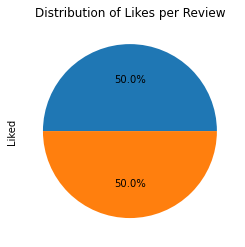

In [13]:
# checking the distribution of Likes
df['Liked'].value_counts().plot.pie(figsize=(4,4),
                                    title="Distribution of Likes per Review",
                                    labels=['',''],
                                    autopct='%1.1f%%')

(-0.5, 399.5, 199.5, -0.5)

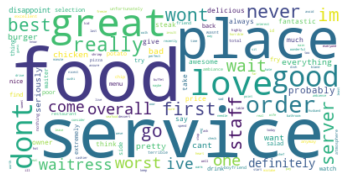

In [14]:
# Creating Word Cloud
string = " ".join(line.split()[0] for line in df["Processed Review"]) 
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

We can see from the wordcloud that the mostly used words are food, service,love, place, dont great, good, etc.

Now we will get a list of the most common words

In [15]:
df.head()

,Review,Processed Review,Liked
0,Wow... Loved this place.,wow love place,1
1,Crust is not good.,crust not good,0
2,Not tasty and the texture was just nasty.,not tasty texture nasty,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,stop late may bank holiday rick steve recommendation love,1
4,The selection on the menu was great and so were the prices.,selection menu great price,1


In [16]:
# displaying the most common words and their counts
top = Counter([j for i in df['Processed Review'] for j in i.split()])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','Count']
freq.style.background_gradient(cmap='Blues')

,Common_words,Count
0,food,125
1,not,116
2,place,112
3,good,95
4,service,84
5,go,76
6,great,70
7,back,61
8,time,55
9,like,51


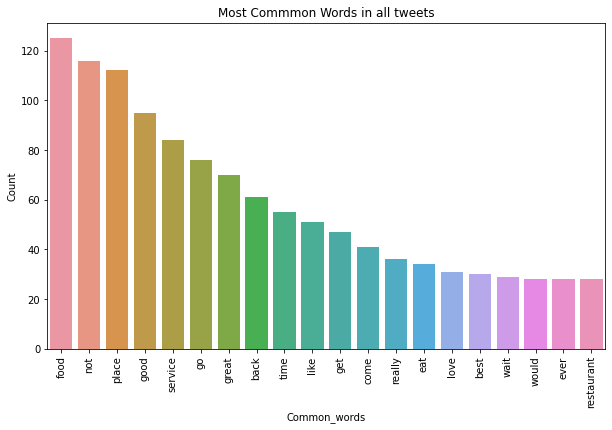

In [17]:
# plotting the most common words in all reviews
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='Count', 
            data=freq, ax=ax)
plt.title("Most Commmon Words in all tweets")
plt.xticks(rotation='vertical');

# Vectorization

In [18]:
# Instanciating Vectorizer objects
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X1 = cv.fit_transform(X).toarray()
X2 = tfidf.fit_transform(X).toarray()

In [19]:
# Instanciating objects of models
lr = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel = 'rbf', random_state = 0)
rf = RandomForestClassifier(n_estimators=200)

classifiers = [lr, nb, svc, rf]

def give_score(model):
    return accuracy_score(y_test,model.predict(X_test))


# Model Training

## 1. Count Vectorizer

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20, random_state = 0)

for i in classifiers:
    i.fit(X_train, y_train)
    print(i, " : ", give_score(i))


LogisticRegression()  :  0.835
GaussianNB()  :  0.725
SVC(random_state=0)  :  0.81
RandomForestClassifier(n_estimators=200)  :  0.815


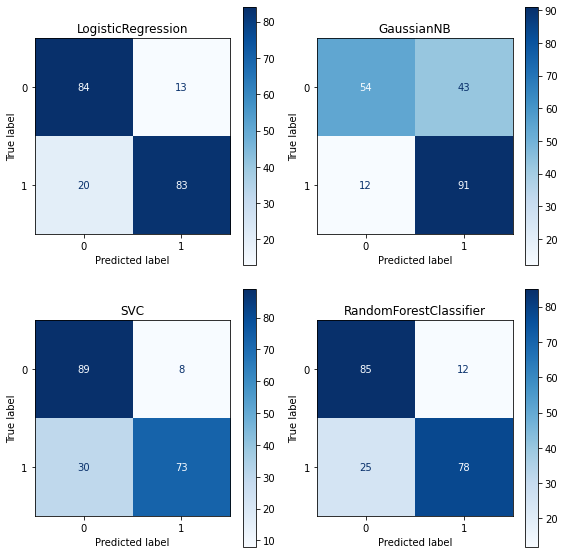

In [21]:
# function to plot confusion matrices
def printConfusionMatrix():
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

    for cls, ax in zip(classifiers, axes.flatten()):
        plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues')
        ax.title.set_text(type(cls).__name__)
    plt.tight_layout()  
    plt.show()

printConfusionMatrix()

## 2. TFIDF Vectorizer

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.20, random_state = 0)

for i in classifiers:
    i.fit(X_train, y_train)
    print(i, " : ", give_score(i))


LogisticRegression()  :  0.83
GaussianNB()  :  0.72
SVC(random_state=0)  :  0.825
RandomForestClassifier(n_estimators=200)  :  0.795


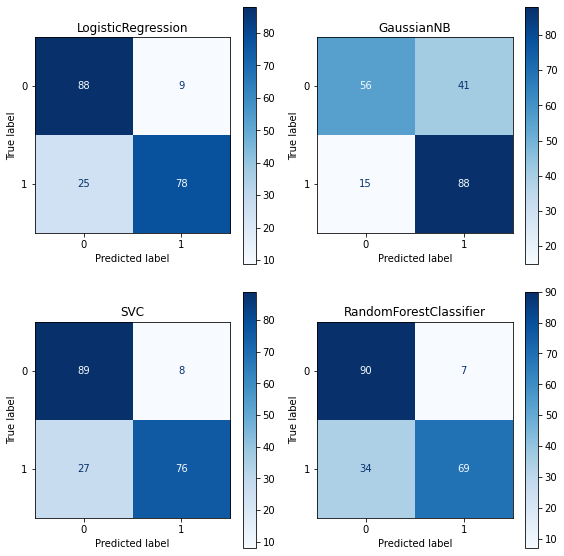

In [23]:
# function to plot confusion matrices
def printConfusionMatrix():
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

    for cls, ax in zip(classifiers, axes.flatten()):
        plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues')
        ax.title.set_text(type(cls).__name__)
    plt.tight_layout()  
    plt.show()

printConfusionMatrix()

# Conclusion and Results

CountVectorizer outperforms the TFIDF slightly. Logistic Regression has the highest accuracy of 83.5% for CountVectorizer and 83% for TFIDF followed by Support Vector Classifier on TFIDF

The best accuracy of 83.5% is acheived by Logistic Regression on CountVectorizer

# Improvements and Future work

1. Make Pipelines
2. K-Fold Cross Validation
3. GridSearchCV and RandomizedSearchCV
4. Collect more data
